<a href="https://colab.research.google.com/github/Moustapha14/ARTIFICIAL-NEURONAL-NETWORK/blob/main/CamemBERT__corrig%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation des dépendances

Pour pouvoir exécuter ce Notebook, l'environnement de développement doit être bien configuré.

In [ ]:
!pip install spacy transformers datasets sentencepiece seaborn pandas -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.3 MB/s eta 0:00:00


De même, nous allons utiliser un jeu de données supplémentaire de HuggingFace pour enrichir notre base.

In [ ]:
!git lfs install
!git clone https://huggingface.co/datasets/Paul/hatecheck-french

Git LFS initialized.
Cloning into 'hatecheck-french'...
remote: Enumerating objects: 15, done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 15
Unpacking objects: 100% (15/15), 80.00 KiB | 1.04 MiB/s, done.


Enfin, spaCy nous permettra de faire des opérations de traitement du texte adapté à la langue française.

In [ ]:
!python -m spacy download fr_core_news_sm

2023-11-25 13:53:04.008895: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 13:53:04.008959: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 13:53:04.009009: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-25 13:53:04.062434: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-25 13:53:06.407470: W tensorflow/compiler/

Pour terminer, nous téléchargeons les données nettoyées prêtes pour l'entraînement.

In [ ]:
!wget https://blent-keskia.s3.eu-west-3.amazonaws.com/poc/cyberharcelement/data_clean.csv

--2023-11-25 13:53:25--  https://blent-keskia.s3.eu-west-3.amazonaws.com/poc/cyberharcelement/data_clean.csv
Resolving blent-keskia.s3.eu-west-3.amazonaws.com (blent-keskia.s3.eu-west-3.amazonaws.com)... 52.95.155.44, 3.5.225.182
Connecting to blent-keskia.s3.eu-west-3.amazonaws.com (blent-keskia.s3.eu-west-3.amazonaws.com)|52.95.155.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2149965 (2.0M) [text/csv]
Saving to: ‘data_clean.csv’

data_clean.csv      100%[===================>]   2.05M  2.53MB/s    in 0.8s    

2023-11-25 13:53:27 (2.53 MB/s) - ‘data_clean.csv’ saved [2149965/2149965]



In [ ]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set()

df = pd.read_csv("data_clean.csv")
df

,Unnamed: 0,Text,Group,Type,combined,combined_index
0,1435063,regardez tout le chemin jusqu'à la fin! ça en ...,other,non-hateful,other non-hateful,23
1,622624,apporter sur le robitussin ... la médecine all...,other,non-hateful,other non-hateful,23
2,830330,oh mon dieu. si vous n'avez jamais vu de radio...,other,non-hateful,other non-hateful,23
3,165558,"j'espère bien, mais je pourrais dépenser toute...",other,non-hateful,other non-hateful,23
4,1668,les français parlent aux français... ils n'y p...,other,hateful,other hateful,22
...,...,...,...,...,...,...
17727,379710,"eh bien, je l'aime, jeez je ne le changerai ja...",other,non-hateful,other non-hateful,23
17728,1209408,- vous savez que c'est génial quand! ... ne ni...,other,non-hateful,other non-hateful,23
17729,493460,ma maman ne va pas m'acheter un pistolet de ne...,other,non-hateful,other non-hateful,23
17730,1423,certains homos entrent au gouvernement. pour m...,gay,hateful,gay hateful,8


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

le = preprocessing.LabelEncoder()
df["combined_index"] = le.fit_transform(df["combined"])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'african_descent hateful': 0,
 'african_descent non-hateful': 1,
 'arabs hateful': 2,
 'arabs non-hateful': 3,
 'asians hateful': 4,
 'asians non-hateful': 5,
 'christian hateful': 6,
 'christian non-hateful': 7,
 'gay hateful': 8,
 'gay non-hateful': 9,
 'hispanics hateful': 10,
 'hispanics non-hateful': 11,
 'immigrants hateful': 12,
 'immigrants non-hateful': 13,
 'indian/hindu hateful': 14,
 'indian/hindu non-hateful': 15,
 'jews hateful': 16,
 'jews non-hateful': 17,
 'left_wing_people hateful': 18,
 'left_wing_people non-hateful': 19,
 'muslims hateful': 20,
 'muslims non-hateful': 21,
 'other hateful': 22,
 'other non-hateful': 23,
 'special_needs hateful': 24,
 'special_needs non-hateful': 25,
 'women hateful': 26,
 'women non-hateful': 27}

# Modélisation avec CamemBERT

<a href="https://camembert-model.fr/" target="_blank">CamemBERT</a> est un BERT (modèle de type Transformer) de HuggingFace entrainé avec des données en français pour classifier des phrases.

Avant d'entraîner le modèle, assurons-nous bien d'avoir un GPU à disposition avec la commande suivante.

In [ ]:
!nvidia-smi

Sat Nov 25 13:53:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     8W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Si rien ne s'affiche, alors cela signifie que tu n'as pas de GPU à disposition, et que l'entraînement sera beaucoup trop long. 😢

Vérifions que le GPU est bien reconnu par TensorFlow.

In [ ]:
import tensorflow as tf

print("Nombre GPUs disponibles :", len(tf.config.list_physical_devices('GPU')))

Nombre GPUs disponibles : 1


Séparons notre jeux de données.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

df = pd.read_csv("data_clean.csv")

# On sépare le jeu de données en sous-ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(
  list(df["Text"]),
  list(df["combined_index"]),
  test_size = 0.15,
  random_state = 42
)

Pour entraîner notre modèle, nous allons faire du **transfer learning** : nous allons nous baser sur un modèle déjà entraîné pour un usage général, afin de le spécifier pour notre case d'usage.

In [ ]:
import transformers

from transformers import AutoTokenizer, AutoModelForMaskedLM

# Import du tokenizer et le modèle avec le paramètre num_labels=28 pour modifier la dernière couche dense de sortie
tokenizer = AutoTokenizer.from_pretrained("camembert-base")
model = transformers.TFCamembertForSequenceClassification.from_pretrained("camembert-base", num_labels=28)

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFCamembertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFCamembertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Par défaut, BERT nécessite un format de données un peu particulier, que l'on utilise avec la fonction suivante.

In [ ]:
# Tokeniser et transformer les données en "dataset" convenable au BERT (avec la bibliothèque Dataset de HuggingFace), soit un dict de tensors
def get_train_ds(X_train, y_train, batch_size=128):
    train_encodings = tokenizer(X_train, truncation=True, padding=True)
    train_ds = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train))
    train_ds = train_ds.batch(batch_size)
    return train_ds

train_ds = get_train_ds(X_train, Y_train)

Nous définissons ensuite les hyper-paramètres pour contrôler en amont l'apprentissage du modèle.

In [ ]:
# Définition des hyperparamètres et compilation le modèle
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=5e-5, decay_steps=10000,decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=optimizer,
  metrics=tf.metrics.SparseCategoricalAccuracy()
)

Maintenant, il ne reste plus qu'à entraîner le modèle.

<div class="alert alert-info">
  Avec 25 itérations, il faut s'attendre à environ 1 heure d'apprentissage avec un GPU.
</div>

In [ ]:
history = model.fit(train_ds, epochs=25)

Epoch 1/25
118/118 [==============================] - 221s 2s/step - loss: 1.8533 - sparse_categorical_accuracy: 0.6109
Epoch 2/25
118/118 [==============================] - 179s 2s/step - loss: 1.0468 - sparse_categorical_accuracy: 0.7550
Epoch 3/25
118/118 [==============================] - 179s 2s/step - loss: 0.7358 - sparse_categorical_accuracy: 0.8195
Epoch 4/25
118/118 [==============================] - 179s 2s/step - loss: 0.5742 - sparse_categorical_accuracy: 0.8433
Epoch 5/25
118/118 [==============================] - 179s 2s/step - loss: 0.4442 - sparse_categorical_accuracy: 0.8857
Epoch 6/25
118/118 [==============================] - 179s 2s/step - loss: 0.3925 - sparse_categorical_accuracy: 0.9029
Epoch 7/25
118/118 [==============================] - 179s 2s/step - loss: 0.3515 - sparse_categorical_accuracy: 0.9090
Epoch 8/25
118/118 [==============================] - 179s 2s/step - loss: 0.4385 - sparse_categorical_accuracy: 0.8921
Epoch 9/25
118/118 [====================

Avant de faire des analyses, on sauvegarde les poids du modèle entraîné.

In [ ]:
tokenizer.save_pretrained(f"bert_tokenizer")
model.save_pretrained(f"bert_model")

On peut également afficher la perte ainsi que l'accuracy par catégorie avec le graphe suivant.

### ➡️ À toi de jouer

Afficher sur un graphique l'évolution de la fonction de perte et de l'accuracy au fil des itérations.

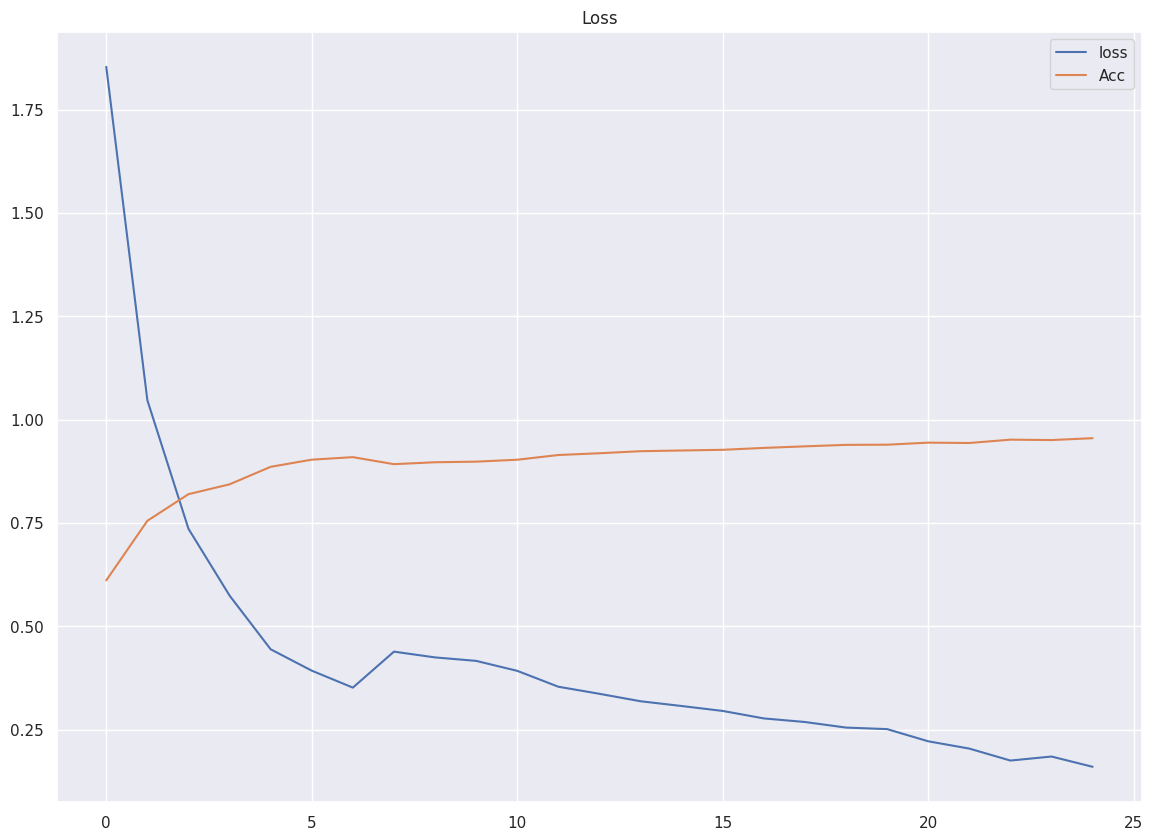

In [ ]:
plt.figure(figsize=(14, 10))
plt.title('Loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['sparse_categorical_accuracy'], label='Acc')

plt.legend()
plt.show()

# Inférence

Maintenant, essayons de charger notre modèle.

In [ ]:
from transformers import TextClassificationPipeline

model_path = "bert_model"
tokenizer = AutoTokenizer.from_pretrained("bert_tokenizer")
model = transformers.TFCamembertForSequenceClassification.from_pretrained(
    model_path,
    id2label={0:'african_descent hateful', 1:'african_descent non-hateful', 2:'arabs hateful', 3:'arabs non-hateful', 4:'asians hateful', 5:'asians non-hateful',
              6:'christian hateful', 7:'christian non-hateful', 8:'gay hateful', 9:'gay non-hateful', 10:'hispanics hateful', 11:'hispanics non-hateful',
              12: 'immigrants hateful', 13:'immigrants non-hateful', 14:'indian/hindu hateful', 15:'indian/hindu non-hateful', 16:'jews hateful', 17:'jews non-hateful',
              18: 'left_wing_people hateful', 19: 'left_wing_people non-hateful', 20:'muslims hateful', 21:'muslims non-hateful',
              22:'other hateful', 23:'other non-hateful',
              24:'special_needs hateful', 25:'special_needs non-hateful', 26:'women hateful', 27: 'women non-hateful'}
)

All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at bert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


Et maintenant, il suffit de taper une phrase pour voir la sortie du modèle.

### ➡️ À toi de jouer

Créer une pipeline d'inférence à partir de l'objet `TextClassificationPipeline`.

In [ ]:
text = ["Je m'en fout de toi vas la bas "]
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer)
pipe(text)

[{'label': 'other non-hateful', 'score': 0.9793070554733276}]

In [ ]:

import random

# Liste de mots positifs
mots_positifs = ["amitié", "amour", "paix", "harmonie", "respect", "bienveillance", "solidarité", "tolérance", "empathie", "entraide"]

# Liste de mots liés à la diversité et à l'inclusion
mots_diversite = ["diversité", "égalité", "inclusion", "multiculturalisme", "pluralité", "acceptation", "unité", "intégration", "respect des différences", "coexistence"]

# Création d'une liste mixte
liste_mixte = mots_positifs + mots_diversite

# Étendre la liste pour obtenir 100 mots en répétant les mots de façon aléatoire
liste_finale = random.choices(liste_mixte, k=100)

#print(liste_finale)

liste_neg = "ASIATE(S), BOCHE(S), CHICANO(S), ENCULEUR, EUSE(S), FEMMELETTE(S), GOGOL, E(S), GOUDOU(S), GOUINE(S), LOPE(S), LOPETTE(S), NABOT, E(S), NÈGRE(S), NÉGRESSE(S), NÉGRILLON, NE(S), PÉDÉ(S), POUF[F]IASSE(S), ROMANO(S), SCHLEU, E(S), SIDAÏQUE(S), TAFIOLE(S), TANTOUSE(S), TANTOUZE(S), TARLOUSE(S), TARLOUZE(S), TRAVELO(S)"












from transformers import TextClassificationPipeline

def classifier(keywords, model, tokenizer):
    # Création de l'objet pipeline de classification
    pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer)

    # Initialisation d'une liste pour stocker les résultats
    results = []

    # Exécution de la classification sur chaque mot-clé
    for keyword in keywords:
        result = pipe(keyword)
        results.append((keyword, result))

    return results

# Utilisation de la fonction
keywords = liste_finale
# Vous devez définir ou charger le modèle et le tokenizer ici
# model = ...
# tokenizer = ...
result = classifier(keywords, model, tokenizer)
cpt = 0
for res in list(result) :
  if res == "hateful":
    cpt +=1
cpt

0